### Implementation of Held_Karp algorithm for Travelling Salesman Problem (TSP)

Valentin Fievez and Alexy Decroocq

In [50]:
import networkx as nx
import itertools as it
import os
import numpy as np
import sys
import matplotlib.pyplot as plt

In [51]:
def distance(a,b): # euclidean distance
    return(np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2))

#### Representation of the graph

expected number of vertices : 20


number of vertices: 20


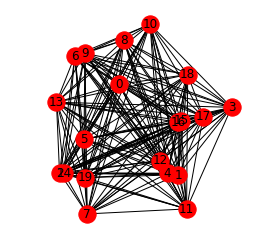

In [52]:
#two ways for representating graphs
g = nx.Graph() 
graph_dict = {}
coordinates_graph = {}

cwd = os.getcwd()
file = "data/tsp20.txt" # several files, play with the number of nodes to see the variations of the computational time
filename = os.path.join(cwd, file) 

with open(filename) as data_file:
    
    node = 0

    # first line is total number of vertices in file
    print("expected number of vertices : {0}\n".format(int(data_file.readline())))

    for line in data_file:
        coordinates_node = tuple(float(x) for x in line.split())
        g.add_node(node)
        coordinates_graph[node]=coordinates_node
        node = node + 1

    for comb in it.combinations(coordinates_graph,2):
        node1 = comb[0]
        node2 = comb[1]
        coord1 = coordinates_graph[node1]
        coord2 = coordinates_graph[node2]
        g.add_edge(node1,node2,weight=distance(coord1,coord2))
        graph_dict[comb] = distance(coord1,coord2)
    
    ax = plt.axes()
    ax.set_axis_off()
    ax.set_aspect(1)
    nx.draw_networkx(g, ax=ax)
    
    print("\nnumber of vertices: {0}".format(node))

#### Held-Karp algorithm

In [53]:
def HK(graph,nb_vertices):
    L = {}
    
    for i in range(1, nb_vertices):
        L[((i,),i)] = graph[(0,i)]
        
    for size in range(1, nb_vertices-1):
        
        for comb in it.combinations(range(1, nb_vertices), size+1):
            
            for j in comb :
                
                first_it = True
                
                for k in comb:
                    
                    if first_it:
                        
                        if k!=j:
                            
                            L[(comb,j)]= L[(tuple(x for x in comb if x!=j), k)] + graph[tuple(sorted((j,k)))]
                            first_it = False
                    else:
                        
                        if k!=j:
                            
                            val = L[(tuple(x for x in comb if x!=j),k)] + graph[tuple(sorted((j,k)))]
                            
                            if val <= L[(comb,j)]:
                                L[(comb,j)] = val
    
    first_it = True
    
    for j in range(1, nb_vertices):
        
        val = L[(tuple(range(1, nb_vertices)), j)]  + graph[(0, j)]
        
        if first_it:
            lenght = val
            first_it = False
        
        else:
            if val <= lenght:
                lenght = val

    return lenght           

In [54]:
print("The minimum distance to see all the cities just once and come back to the starting point is: ", HK(graph_dict, node))

The minimum distance to see all the cities just once and come back to the starting point is:  23328.990366914215
